## CP#21 - Medical X-Ray Image Classifier: Pneumonia Detection

### Importing libraries

In [18]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import cv2

### Function definitions

### Script parameters and constant values

In [80]:
local_dir_train = "../../data/train"
local_dir_test = "../../data/test"
local_dir_val = "../../data/val"

### Preprocessing the Dataset

In [149]:
transform_train = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), # grayscale
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),    
    transforms.Resize((128, 128)), #output size
    transforms.RandomApply(  # random blur, probability = 0.3
        [transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 5.0))],
        p=0.3  # 50% szans na zastosowanie rozmycia
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]) # general normalization for grayscale
])

In [147]:
transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [150]:
dataset_train = datasets.ImageFolder(root=local_dir_train, transform=transform_train)
dataset_test = datasets.ImageFolder(root=local_dir_test, transform=transform_test)
dataset_val = datasets.ImageFolder(root=local_dir_val, transform=transform_test)


In [151]:
loader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)
loader_val = DataLoader(dataset_val, batch_size=32, shuffle=False

### Data Visualization

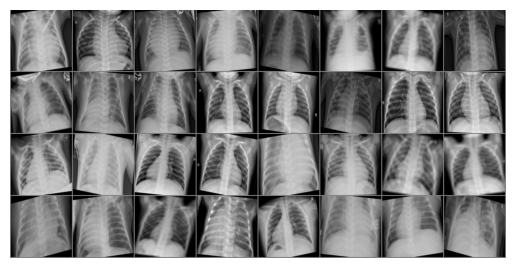

In [153]:
# Function to visualize a batch of images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5])
    std = np.array([0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(loader_train))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

plt.axis('off')
imshow(out, title="")

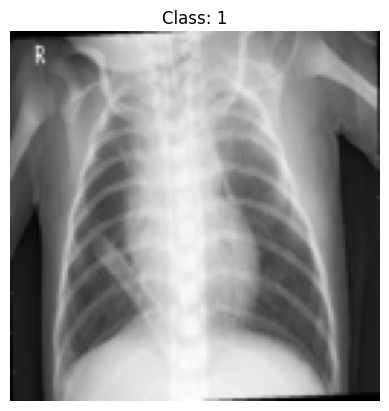

In [142]:
image = inputs[4]  # Torch.Size([1, 128, 128])

# Odwrócenie normalizacji
mean = 0.5
std = 0.5
image = image * std + mean  # Denormalizacja

# Usunięcie wymiaru kanału
image = image.squeeze()

# Wyświetlenie obrazu w skali szarości
plt.imshow(image, cmap='gray')
plt.title(f'Class: {classes[0]}')
plt.axis('off')
plt.show()